# Data Extraction, Visualization, Exploration and Preparation

In [1]:
import pandas as pd
import datetime as dtime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

with open("../../data/crypto-markets.csv") as f:
    df = pd.read_csv(f)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   date         942297 non-null  object 
 4   ranknow      942297 non-null  int64  
 5   open         942297 non-null  float64
 6   high         942297 non-null  float64
 7   low          942297 non-null  float64
 8   close        942297 non-null  float64
 9   volume       942297 non-null  float64
 10  market       942297 non-null  float64
 11  close_ratio  942297 non-null  float64
 12  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


In [2]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [3]:
# see how many different coins we have
print(f'There is { df["slug"].unique().shape[0]} different currencies in this dataset.')

There is 2071 different currencies in this dataset.


In [4]:
# convert date from str format to datetime timestamp format
df['date']= pd.to_datetime(df['date'])


# separate bitcoin data
df_btc = df.groupby('symbol').get_group('BTC')


# drop unwanted columns
df_btc = df_btc.drop(columns=['market', 'close_ratio', 'spread', 'volume'])


df_btc

,slug,symbol,name,date,ranknow,open,high,low,close
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21
...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42


---
Just to have a better understanding of the data:


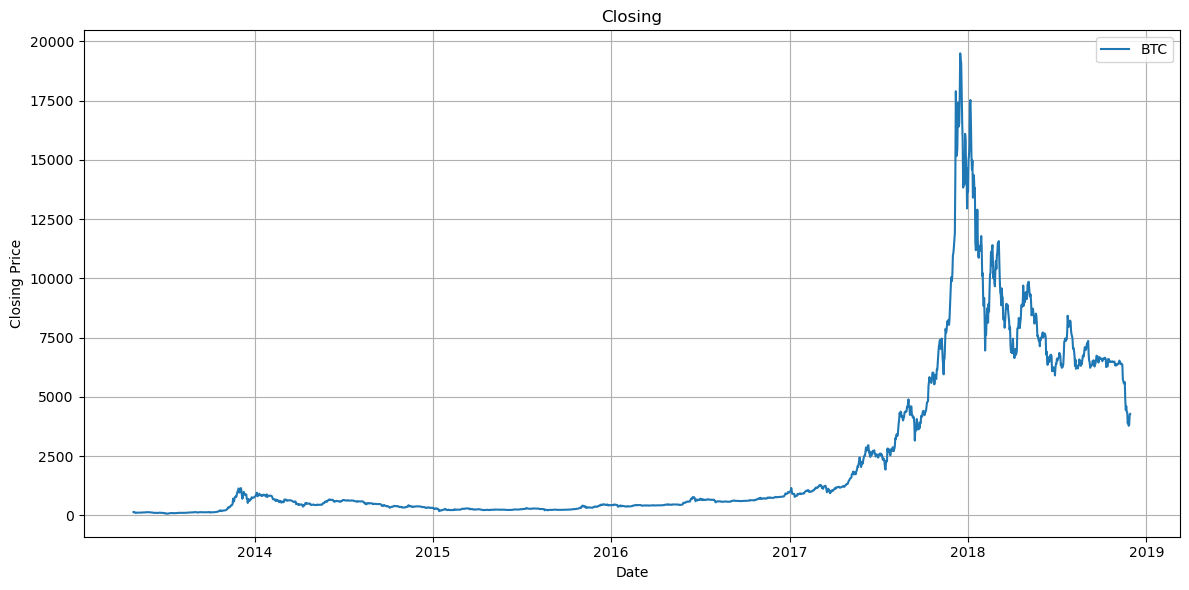

In [5]:
# add changable start and end date for adjustable time window
start_date = "2013-04-28"
end_date = "2018-11-29"
df_btc_date_picked = df_btc[(df_btc['date'] >= start_date) & (df_btc['date'] <= end_date)]
plt.figure(figsize=(12,6))
plt.plot(df_btc_date_picked['date'], df_btc_date_picked['close'], label= 'BTC')
plt.title('Closing')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---
The aim is to predict the tomorrow's closing price. as the selected features are considered inputs for the prediction of the next day's price, there should be a lag between them and the target variable. one way is to move all the features one day forward, to align them with tomorrow's closing price, or implement a better approach of moving closing price one day bacwards.

In [6]:
# shift closing price, the target, backwards to create the lagged effect
df_btc['close_lag-1']= df_btc['close'].shift(-1)

# drop nan value created by this tranformation (here is only one row, the last row)
df_btc = df_btc.dropna()

df_btc



,slug,symbol,name,date,ranknow,open,high,low,close,close_lag-1
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,144.54
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,139.00
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,116.99
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,105.21
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,97.75
...,...,...,...,...,...,...,...,...,...,...
2036,bitcoin,BTC,Bitcoin,2018-11-24,1,4347.69,4413.09,3795.16,3880.76,4009.97
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,3779.13
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,3820.72
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,4257.42


In [7]:
# pick features and target variable
y = df_btc['close_lag-1'].values
x = df_btc[['open', 'high', 'low', 'close']].values # TODO close seems like a good feature for it's future price, like a momentum. test model with and without it ?


# split the data, instead of randomly, pick the last year of data as testing set, and the rest as training set
max_date = max(df_btc['date'])

""" this was my first idea to split the data, using separation date and manually"""
# separation_date = max_date - dtime.timedelta(days=365) # let's say all years have 365 days, not that important here (should have used relativedelta from dateutil)

""" but lets use split function with shuffle turned off"""
test_size = 365 / (max_date - min(df_btc['date'])).days
x_train_full, x_test, y_train_full, y_test = train_test_split(x,y, test_size=test_size, shuffle=False)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, shuffle=False)

print(f'x_train shape: {x_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (1340, 4)
x_val shape: (335, 4)
x_test shape: (366, 4)
y_train shape: (1340,)
y_val shape: (335,)
y_test shape: (366,)


In [8]:
# Data Normalization, lets do a simple MinMax
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)


# make y compatible for transformation
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)


y_train_scaled = scaler.fit_transform(y_train_reshaped)
y_test_scaled = scaler.transform(y_test_reshaped)
y_val_scaled = scaler.transform(y_val_reshaped)



y_val_scaled.shape

(335, 1)

# Deep Learning

In [9]:
# Structure of Model (layers, optimizer, loss, metrics)

model = Sequential([
    Dense(128, activation='relu', input_dim=x_train_scaled.shape[1]),  # Input layer

    Dropout(0.2),

    Dense(64, activation='relu'),  # Hidden layer

    Dropout(0.2),

    Dense(1)  # Output layer for regression
])

# Tweak the optimizer
optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])







/Users/ryan/miniconda3/envs/dsi_39/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1671 - mae: 0.3434 - val_loss: 6.6461 - val_mae: 2.0689
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0598 - mae: 0.1881 - val_loss: 2.4960 - val_mae: 1.2404
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188 - mae: 0.0981 - val_loss: 0.9898 - val_mae: 0.7521
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103 - mae: 0.0766 - val_loss: 0.5699 - val_mae: 0.5537
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 - mae: 0.0758 - val_loss: 0.4409 - val_mae: 0.4818
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084 - mae: 0.0689 - val_loss: 0.3998 - val_mae: 0.4594
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - mae: 0.0641 - val_loss: 0.3055 - val_mae: 0.3942
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - mae: 0.0572 - val_loss: 0.2245 - val_mae: 0.3288
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - mae: 

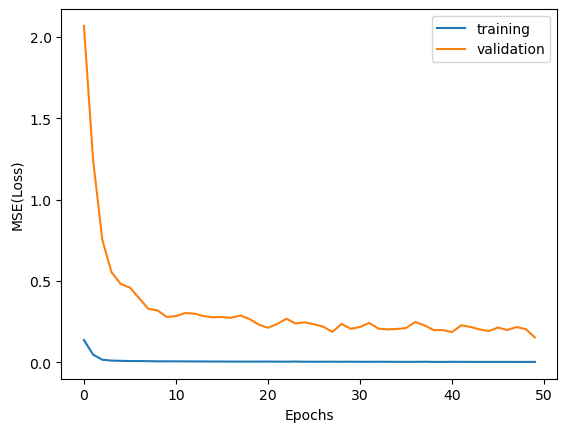

In [10]:
# Training the model
history = model.fit(
    x_train_scaled, y_train_scaled,
    validation_data = (x_val_scaled,y_val_scaled),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Plot the Loss/Epochs relation
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_mae'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('MSE(Loss)')
plt.legend()
plt.show()
 

In [11]:
# Validation
# Evaluate the model
loss, mae = model.evaluate(x_test_scaled, y_test_scaled)
print(f"Test Loss: {loss}, Test MAE: {mae}")



# Make predictions
y_pred = model.predict(x_test_scaled)


# Calculate Other Metrics (with scaled values)
explained_variance = explained_variance_score(y_test_scaled, y_pred)
max_err = max_error(y_test_scaled, y_pred)
r_squared = r2_score(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = root_mean_squared_error(y_test_scaled, y_pred)

print(f"Explained Variance: {explained_variance}")
print(f"Max Error: {max_err}")
print(f"R-Squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Scale the Target Variable back
y_pred_not_scaled = scaler.inverse_transform(y_pred)
y_pred_not_scaled

# Calculate Other Metrics (with not scaled values)
explained_variance = explained_variance_score(y_test, y_pred_not_scaled)
max_err = max_error(y_test, y_pred_not_scaled)
r_squared = r2_score(y_test, y_pred_not_scaled)
mae = mean_absolute_error(y_test, y_pred_not_scaled)
mse = mean_squared_error(y_test, y_pred_not_scaled)
rmse = root_mean_squared_error(y_test, y_pred_not_scaled)

print("___________________")
print(f"Metrics with Target Values Scaled Back:")
print(f"Explained Variance: {explained_variance}")
print(f"Max Error: {max_err}")
print(f"R-Squared: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f'Root Mean Squared Error (RMSE): {rmse}')
 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9304 - mae: 0.6798
Test Loss: 0.46273112297058105, Test MAE: 0.4754366874694824
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Explained Variance: 0.960391055360365
Max Error: 4.876683157323605
R-Squared: 0.9413131009472886
Mean Absolute Error (MAE): 0.47543666625563946
Mean Squared Error (MSE): 0.46273114091030987
Root Mean Squared Error (RMSE): 0.6802434423868486
___________________
Metrics with Target Values Scaled Back:
Explained Variance: 0.9603910589911561
Max Error: 5280.179492187501
R-Squared: 0.941313120484485
Mean Absolute Error (MAE): 514.7741452143101
Mean Squared Error (MSE): 542471.5241506026
Root Mean Squared Error (RMSE): 736.5266622129865


# Visualization and Sample Prediction for Future

In [12]:
row_n = 250

print(f'Actual price: {y_test[row_n]}')
print(f'Predicted price: {y_pred_not_scaled[row_n][0]}')
print("features:")
x_test[row_n]

Actual price: 6951.8
Predicted price: 6710.767578125
features:


array([7031.08, 7102.77, 6940.7 , 7068.48])

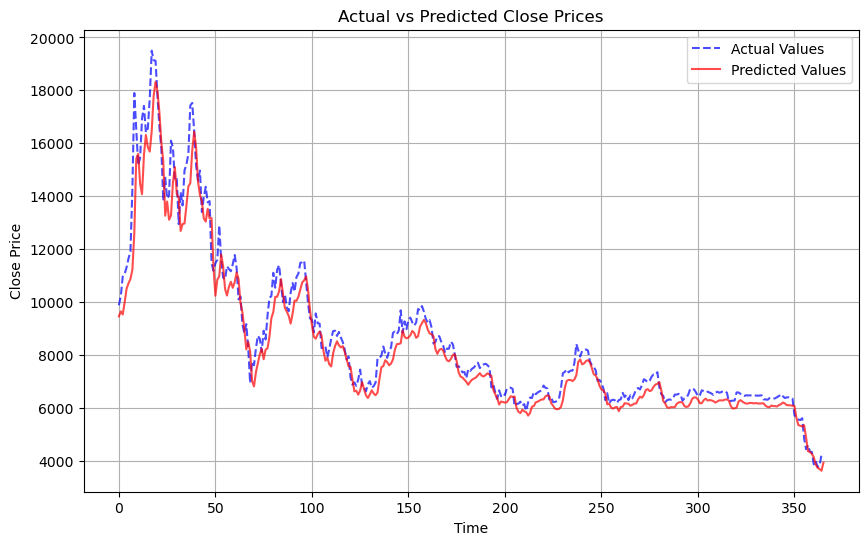

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue', linestyle='dashed', alpha=0.7)
plt.plot(y_pred_not_scaled, label='Predicted Values', color='red', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

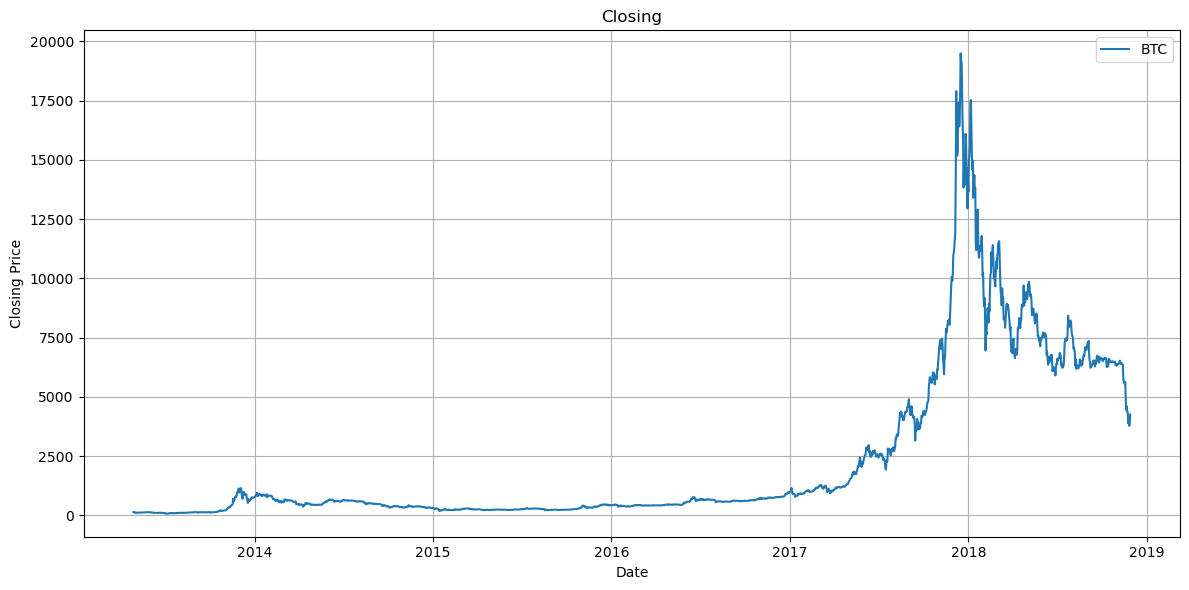

In [14]:
# add changable start and end date for adjustable time window
start_date = "2013-04-28"
end_date = "2018-11-29"
df_btc_date_picked = df_btc[(df_btc['date'] >= start_date) & (df_btc['date'] <= end_date)]
plt.figure(figsize=(12,6))
plt.plot(df_btc_date_picked['date'], df_btc_date_picked['close'], label= 'BTC')
plt.title('Closing')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Reflection

Model seems to be working well with the test set. the gap between training and validation results during training might indicate overfitting, but the performance of model on testing reduces the posibility, although adding dropout layers minimized the gap in both training and prediction diagrams.
one possible expalanation for the difference between validation and training results could be the fact that they are from different amount ranges (look at the diagram, validation is mostly the middle part, the increasing part, of bitcoin prices). so possibily, by starting training from somewhere around 2017, we might see a better results as model won't be trained mostly with data that is considered irrelavant to the actual interesting part of it, the right part.